# Praca zaliczeniowa z Bootcampu Data Science
### Celem projektu jest pórownanie klasyfikatorów zastosowanych do modelu predykcji oceny zdolnosci kredytowej.

![zdjęcie](https://www.hiponet.pl/file/get/hash/d8cf28/size/big/sid/513)





## Opis danych: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

## Źródło danych: http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data

![zdjęcie](https://archive.ics.uci.edu/ml/assets/logo.gif)

## Informacje o zmiennych:

1. (Zmienna jakościowa) Status istniejącego konta rozliczeniowego
    * A11 : ... < 0 DM
    * A12 : 0 <= ... < 200 DM
    * A13 : ... >= 200 DM / Otrzymywane wynagrodzenie w conajmniej ostatnim roku
    * A14 : Brak konta (no checking account)


2. (Zmienna numeryczna) Czas trwania kredytu w miesiącach

3. (Zmienna jakościowa) Historia kredytowa
    * A30 : brak zaciągniętych kredytów / wszystkie kredyty spłacone (credits taken/all credits paid back duly)
    * A31 : wszystkie kredyty w tym banku spłacone (all credits at this bank paid back duly)
    * A32 : dotychczasowe kredyty należycie spłacane (existing credits paid back duly till now)
    * A33 : opóźnienie w spłacie w przeszłości (delay in paying off in the past)
    * A34 : kluczowe konto/inne kredyty poza bankiem (critical account/other credits existing (not at this bank))
    

4. (Zmienna jakościowa) Cel
     * A40: samochód (nowy)
     * A41: samochód (używany)
     * A42: meble / wyposażenie
     * A43: radio / telewizja
     * A44: sprzęt gospodarstwa domowego
     * A45: naprawy
     * A46: edukacja
     * A47: wakacje
     * A48: przekwalifikowanie
     * A49: biznes
     * A410: inne
     
     
5. (Zmienna numeryczna) Kwota kredytu


6. (Zmienn jakościowa) Rachunek oszczędnościowy / obligacje
     * A61: ... <100 DM
     * A62: 100 <= ... <500 DM
     * A63: 500 <= ... <1000 DM
     * A64: ..> = 1000 DM
     * A65: nieznany / brak konta oszczędnościowego (nieznane / brak konta oszczędnościowego)
    

7. (Zmienna jakościowa) Obecne zatrudnienie od
     * A71: bezrobotny
     * A72: ... <1 rok
     * A73: 1 <= ... <4 lata
     * A74: 4 <= ... <7 lat
     * A75: ..> = 7 lat
    
    
8. (Zmienna numeryczna) Stopa raty jako procent dochodu do dyspozycji


9. (Zmienna jakościowa) Status osobisty i płeć
     * A91: mężczyzna: rozwiedziony / w separacji
     * A92: kobieta: rozwiedziona / w separacji / w związku małżeńskim
     * A93: mężczyzna: wolny
     * A94: mężczyzna: żonaty / owdowiały
     * A95: kobieta: singiel
    
    
10. (Zmienna jakościowa) Inni dłużnicy / poręczyciele
     * A101: brak
     * A102: współwnioskodawca
     * A103: poręczyciel
    
    
11. (Zmienna numeryczna) Obecne miejsce zamieszkania od

12. (Zmienna jakościowa) Nieruchomość A121: nieruchomość
     * A122: jeśli nie A121: umowa oszczędnościowa dla towarzystwa budowlanego / ubezpieczenie na życie
     * A123: jeśli nie A121 / A122: samochód lub inny, nie w atrybucie 6
     * A124: nieznana / brak właściwości
    
    
13. (Zmienna numeryczna) Wiek w latach


14. (Zmienna jakościowa) Inne plany ratalne
     * A141: bank
     * A142: sklepy
     * A143: brak
     
    
15. (Zmienna jakościowa) Mieszkanie
     * A151: wynajem
     * A152: własne
     * A153: bez kosztów


16. (Zmienna numeryczna) Liczba kredytów w tym banku


17. (Zmienna jakościowa) Praca
     * A171: bezrobotni / niewykwalifikowani - nierezydenci
     * A172: niewykwalifikowany - rezydent
     * A173: wykwalifikowany pracownik / urzędnik
     * A174: kierownictwo / samozatrudniony / wysoko wykwalifikowany pracownik / oficer
    
    
18. (Zmienna numeryczna) Liczba osób na utrzymaniu

19. (Zmienna jakościowa) Telefon
     * A191: brak
     * A192: tak, zarejestrowany pod nazwą klienta
     
     
20. (Zmienna jakościowa) Pracownik obcokrajowy
    * A201 : tak
    * A202 : nie


## Zmienna Celu - ryzyko kredytowe


Macierz kosztów (Cost Matrix)
    * 1 = Dobre ryzyko (Good Risk)
    * 2 = Złe ryzyko (Bad Risk)

### Zaczytuje potrzebne pakiety, w przypadku gdy ktorys z nich nie działa, należy je zainstalować w konsoli

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import scikitplot as skplt
import seaborn as sns
import statsmodels.api as sm
import time
import warnings
from IPython.display import display, HTML
from collections import Counter
from math import floor, ceil
from numpy import int64, mean, std
from pandas import read_csv
from scipy import stats
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import (
    AdaBoostClassifier, 
    BaggingClassifier, 
    ExtraTreesClassifier, 
    GradientBoostingClassifier, 
    RandomForestClassifier, 
    RandomForestRegressor
)
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import BayesianRidge, Lasso, LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_curve, fbeta_score, make_scorer, r2_score, mean_squared_error
)
from sklearn.model_selection import (
    GridSearchCV, 
    KFold, 
    RepeatedStratifiedKFold, 
    StratifiedKFold, 
    train_test_split, 
    cross_val_score, 
    RandomizedSearchCV
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import FeatureUnion, make_pipeline, make_union, Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, scale
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.utils import resample
from statsmodels.stats.diagnostic import lilliefors
from xgboost import XGBClassifier, XGBRegressor
#warnings.filterwarnings('ignore')

### Wczytuje zmienne z lokalizacji http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data , dodaje opisy danych

In [2]:
column_names = [
    "Status of existing checking account",
    "Duration in month",
    "Credit history",
    "Purpose",
    "Credit amount",
    "Savings account/bonds",
    "Present employment since",
    "Installment rate in percentage of disposable income",
    "Personal status and sex",
    "Other debtors / guarantors",
    "Present residence since",
    "Property",
    "Age in years",
    "Other installment plans",
    "Housing",
    "Number of existing credits at this bank",
    "Job",
    "Number of people being liable to provide maintenance for",
    "Telephone",
    "foreign worker",
    "Cost Matrix(Risk)",
]

df = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",
    sep=" ",
    names=column_names,
    header=None,
)

df.to_csv("german_data_credit_cat.csv", index=False)  # Zapisuje jako plik CSV

df["Status of existing checking account"] = df["Status of existing checking account"].map(
    {"A14": "no checking account", "A11": "<0 DM", "A12": "0 <= <200 DM", "A13": ">= 200 DM "}
)

df["Credit history"] = df["Credit history"].map(
    {
        "A34": "critical account",
        "A33": "delay in paying off",
        "A32": "existing credits paid back duly till now",
        "A31": "all credits at this bank paid back duly",
        "A30": "no credits taken",
    }
)
df["Purpose"] = df["Purpose"].map(
    {
        "A40": "car (new)",
        "A41": "car (used)",
        "A42": "furniture/equipment",
        "A43": "radio/television",
        "A44": "domestic appliances",
        "A45": "repairs",
        "A46": "education",
        "A47": "vacation",
        "A48": "retraining",
        "A49": "business",
        "A410": "others",
    }
)

df["Savings account/bonds"] = df["Savings account/bonds"].map(
    {
        "A65": "no savings account",
        "A61": "<100 DM",
        "A62": "100 <= <500 DM",
        "A63": "500 <= < 1000 DM",
        "A64": ">= 1000 DM",
    }
)

df["Present employment since"] = df["Present employment since"].map(
    {
        "A75": ">=7 years",
        "A74": "4<= <7 years",
        "A73": "1<= < 4 years",
        "A72": "<1 years",
        "A71": "unemployed",
    }
)

df["Personal status and sex"] = df["Personal status and sex"].map(
    {
        "A95": "female:single",
        "A94": "male:married/widowed",
        "A93": "male:single",
        "A92": "female:divorced/separated/married",
        "A91": "male:divorced/separated",
    }
)

df["Other debtors / guarantors"] = df["Other debtors / guarantors"].map(
    {"A101": "none", "A102": "co-applicant", "A103": "guarantor"}
)

df["Property"] = df["Property"].map(
    {
        "A121": "real estate",
        "A122": "savings agreement/life insurance",
        "A123": "car or other",
        "A124": "unknown / no property",
    }
)


df["Other installment plans"] = df["Other installment plans"].map(
    {"A143": "none", "A142": "store", "A141": "bank"}
)

df["Housing"] = df["Housing"].map({"A153": "for free", "A152": "own", "A151": "rent"})

df["Job"] = df["Job"].map(
    {
        "A174": "management/ highly qualified employee",
        "A173": "skilled employee / official",
        "A172": "unskilled - resident",
        "A171": "unemployed/ unskilled  - non-resident",
    }
)

df["Telephone"] = df["Telephone"].map({"A192": "yes", "A191": "none"})
df["foreign worker"] = df["foreign worker"].map({"A201": "yes", "A202": "no"})
df["Cost Matrix(Risk)"] = df["Cost Matrix(Risk)"].map({1: "Good Risk", 2: "Bad Risk"})

### Ilość wierszy i kolumn w tabeli przed przekształceniami na zmienne liczbowe

In [3]:
df.shape

(1000, 21)

### Pierwsze wiersze i nagłówki kolumn

In [4]:
df.head(5) 

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,...,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,...,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk


### Informacje o typie zmiennych

In [5]:
df.info(null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Status of existing checking account                         1000 non-null object
Duration in month                                           1000 non-null int64
Credit history                                              1000 non-null object
Purpose                                                     1000 non-null object
Credit amount                                               1000 non-null int64
Savings account/bonds                                       1000 non-null object
Present employment since                                    1000 non-null object
Installment rate in percentage of disposable income         1000 non-null int64
Personal status and sex                                     1000 non-null object
Other debtors / guarantors                                  1000 non-null object
Present residence since                                     1000 non-null int64
Propert

 Zbiór nie zawiera braków danych.

### Zmienne liczbowe zbioru

In [6]:
subset = df.select_dtypes(include=[np.number])
subset.columns

Index(['Duration in month', 'Credit amount',
       'Installment rate in percentage of disposable income',
       'Present residence since', 'Age in years',
       'Number of existing credits at this bank',
       'Number of people being liable to provide maintenance for'],
      dtype='object')

### Wykres korelacji między zmiennymi numerycznymi

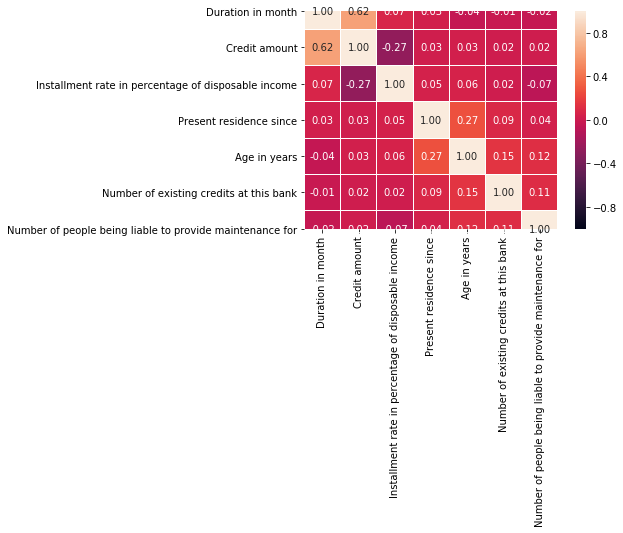

In [7]:
sns.heatmap(
    subset.astype(float).corr(),
    linewidths=0.05,
    vmax=1.0,
    vmin=-1,
    square=True,
    annot=True,
    fmt=".2f",
)

### Histogram czasu trwania kredytu

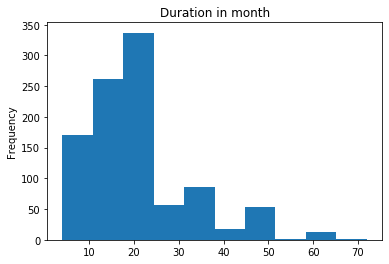

In [8]:
df["Duration in month"].plot(kind="hist", title="Duration in month")

### Wykresy pudełkowe zależności pomiędzy ryzykiem kredytowym a kwotą kredytu, czasem trwania kredytu i wiekiem

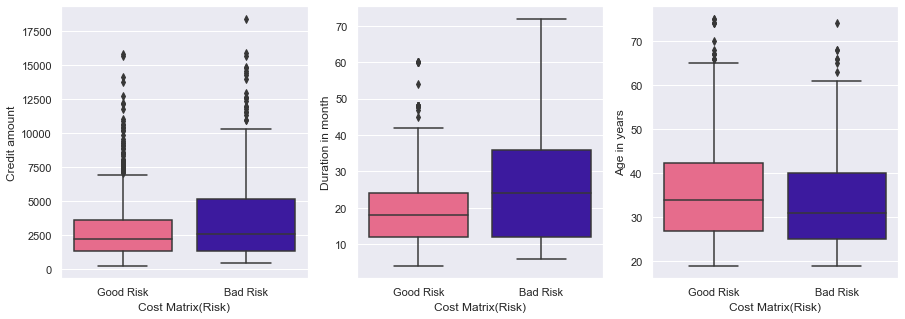

In [9]:
sns.set()
f, axes = plt.subplots(1, 3, figsize=(15, 5))
for axis, variable in zip(axes, ("Credit amount", "Duration in month", "Age in years")):
    sns.boxplot(y=df[variable], x=df["Cost Matrix(Risk)"], orient="v", ax=axis, palette=["#FA5882", "#3104B4"])

### Statystyki zmiennych: kwota kredytu, wiek w latach i czas trwania kredytu

In [10]:
# Charakterystyki zmiennych kwota kredytu, wiek w latach i trwanie w latach
df[["Credit amount", "Age in years", "Duration in month"]].describe() 

,Credit amount,Age in years,Duration in month
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,35.546000,20.903000
std,2822.736876,11.375469,12.058814
min,250.000000,19.000000,4.000000
25%,1365.500000,27.000000,12.000000
50%,2319.500000,33.000000,18.000000
75%,3972.250000,42.000000,24.000000
max,18424.000000,75.000000,72.000000


### Rozkład kwot kredytów, o które zostały zgłoszone wnioski

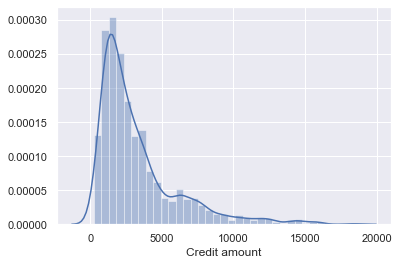

In [11]:
sns.distplot(df["Credit amount"])

### Wizualizacja danych w podziale na negatywne decyzje kredytowe i pozytywne

In [12]:
def visualize_distribution(attr):
    good_risk_df = df[df["Cost Matrix(Risk)"] == "Good Risk"]
    bad_risk_df = df[df["Cost Matrix(Risk)"] == "Bad Risk"]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    attr_good_risk_df = good_risk_df[[attr, "Cost Matrix(Risk)"]].groupby(attr).count()
    attr_bad_risk_df = bad_risk_df[[attr, "Cost Matrix(Risk)"]].groupby(attr).count()
    ax[0].barh(
        attr_good_risk_df["Cost Matrix(Risk)"].index,
        attr_good_risk_df["Cost Matrix(Risk)"],
        align="center",
        color="#5975A4",
    )
    ax[1].barh(
        attr_bad_risk_df["Cost Matrix(Risk)"].index,
        attr_bad_risk_df["Cost Matrix(Risk)"],
        align="center",
        color="#B55D60",
    )
    ax[0].set_title("Good Risk")
    ax[1].set_title("Bad Risk")
    ax[0].invert_xaxis()
    ax[1].yaxis.tick_right()

    num_para_change = [
        "Present residence since",
        "Number of existing credits at this bank",
        "Installment rate in percentage of disposable income",
        "Number of people being liable to provide maintenance for",
    ]
    if attr in num_para_change:
        for i, v in enumerate(attr_good_risk_df["Cost Matrix(Risk)"]):
            ax[0].text(v + 15, i + 1, str(v), color="black")
        for i, v in enumerate(attr_bad_risk_df["Cost Matrix(Risk)"]):
            ax[1].text(v + 2, i + 1, str(v), color="black")
    else:
        for i, v in enumerate(attr_good_risk_df["Cost Matrix(Risk)"]):
            ax[0].text(v + 25, i + 0.05, str(v), color="black")
        for i, v in enumerate(attr_bad_risk_df["Cost Matrix(Risk)"]):
            ax[1].text(v + 1, i + 0.05, str(v), color="black")
    plt.suptitle(attr)
    plt.tight_layout()
    plt.show()

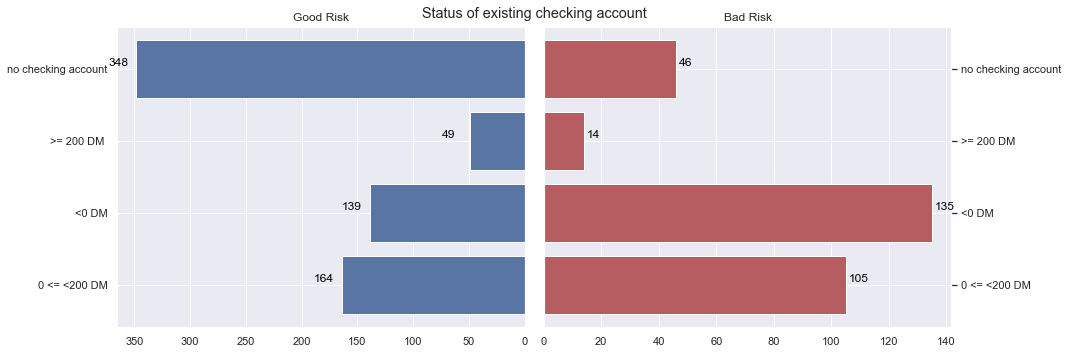

In [13]:
visualize_distribution("Status of existing checking account")

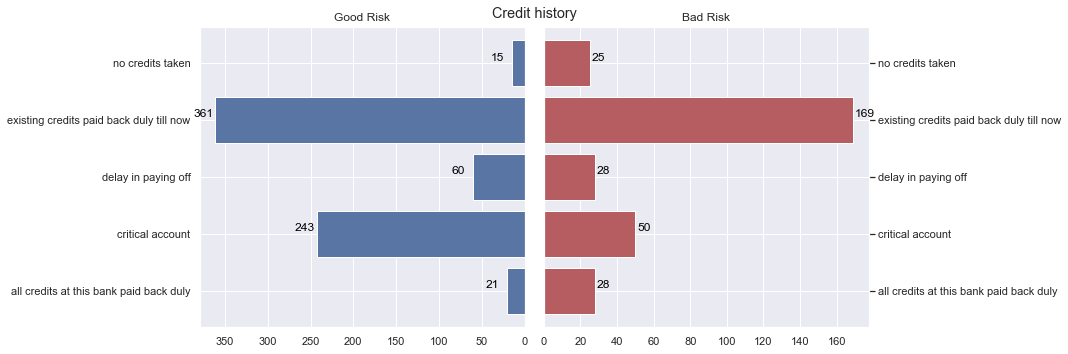

In [14]:
visualize_distribution("Credit history")

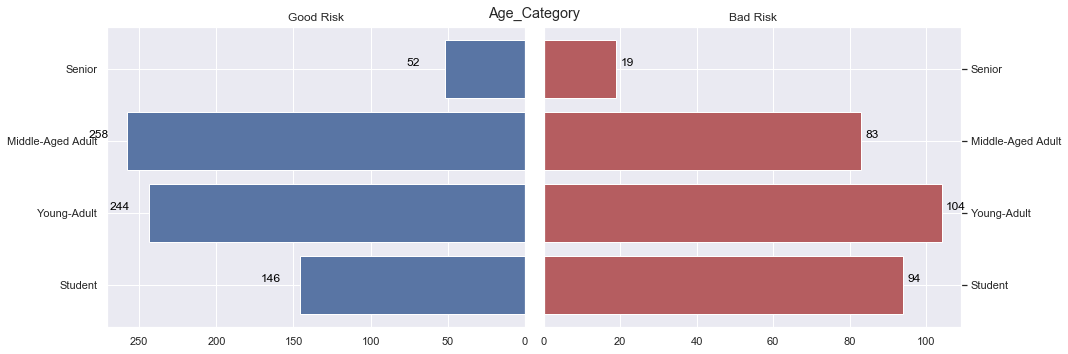

In [15]:
age_interval = [18, 26, 35, 55, 120]
age_category = ["Student", "Young-Adult", "Middle-Aged Adult", "Senior"]
df["Age_Category"] = pd.cut(df["Age in years"], age_interval, labels=age_category)
visualize_distribution("Age_Category")

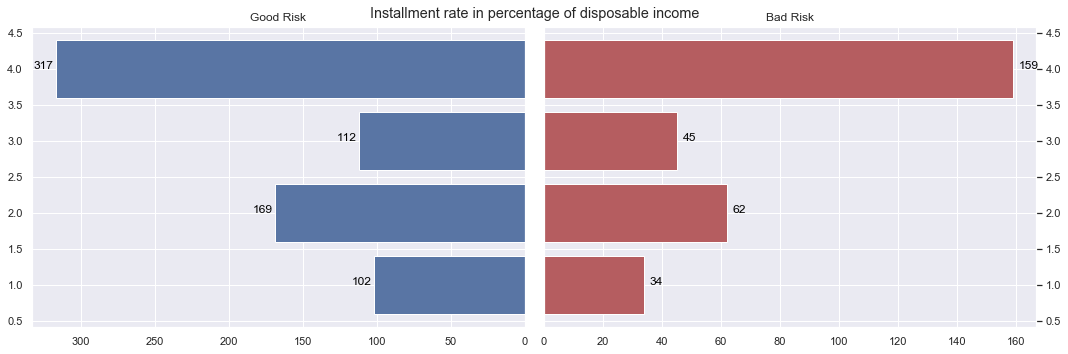

In [16]:
visualize_distribution("Installment rate in percentage of disposable income")

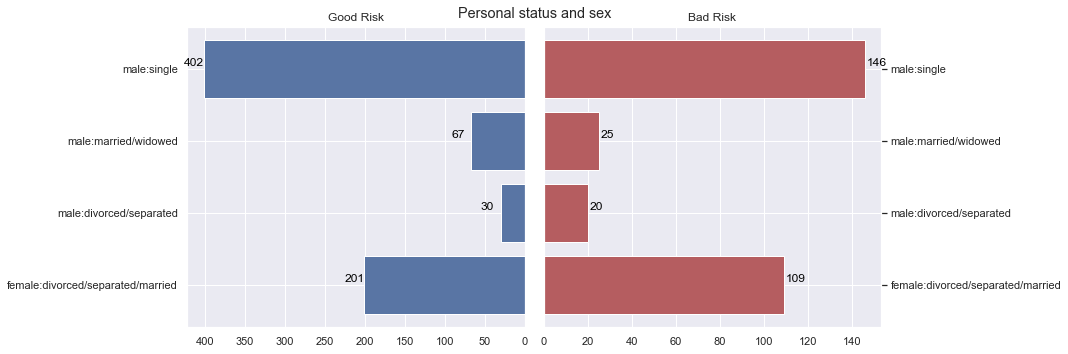

In [17]:
visualize_distribution("Personal status and sex")

## Przygotowanie zmiennych do modelowania

### Tworzenie zmiennych fikcyjnych na podstawie zmiennych kategorii

In [18]:
attr_significant = [
    "Status of existing checking account",
    "Credit history",
    "Purpose",
    "Savings account/bonds",
    "Present employment since",
    "Personal status and sex",
    "Property",
    "Other installment plans",
    "Housing",
    "foreign worker",
    "Credit amount",
    "Age in years",
    "Duration in month",
]

target_variable = ["Cost Matrix(Risk)"]
df = df[attr_significant + target_variable]

col_cat_names = [
    "Status of existing checking account",
    "Credit history",
    "Purpose",
    "Savings account/bonds",
    "Present employment since",
    "Personal status and sex",
    "Property",
    "Other installment plans",
    "Housing",
    "foreign worker",
]

for attr in col_cat_names:
    df = df.merge(pd.get_dummies(df[attr], prefix=attr, dtype=int64), left_index=True, right_index=True)
    df.drop(attr, axis=1, inplace=True)

### Zmieniam wartość CELU mojego modelu na numeryczną

In [19]:
risk = {"Good Risk": 1, "Bad Risk": 0}
df["Cost Matrix(Risk)"] = df["Cost Matrix(Risk)"].map(risk)

### Sprawdzam jak wygląda obecnie tabela po przekształceniach

In [20]:
df.head()

,Credit amount,Age in years,Duration in month,Cost Matrix(Risk),Status of existing checking account_0 <= <200 DM,Status of existing checking account_<0 DM,Status of existing checking account_>= 200 DM,Status of existing checking account_no checking account,Credit history_all credits at this bank paid back duly,Credit history_critical account,...,Property_savings agreement/life insurance,Property_unknown / no property,Other installment plans_bank,Other installment plans_none,Other installment plans_store,Housing_for free,Housing_own,Housing_rent,foreign worker_no,foreign worker_yes
0,1169,67,6,1,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
1,5951,22,48,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,2096,49,12,1,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,7882,45,42,1,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
4,4870,53,24,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1


### Sprawdzenie formatu i typów danych

In [21]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
Credit amount                                                1000 non-null int64
Age in years                                                 1000 non-null int64
Duration in month                                            1000 non-null int64
Cost Matrix(Risk)                                            1000 non-null int64
Status of existing checking account_0 <= <200 DM             1000 non-null int64
Status of existing checking account_<0 DM                    1000 non-null int64
Status of existing checking account_>= 200 DM                1000 non-null int64
Status of existing checking account_no checking account      1000 non-null int64
Credit history_all credits at this bank paid back duly       1000 non-null int64
Credit history_critical account                              1000 non-null int64
Credit history_delay in paying off                           1000 non-null int64
Cre

### Usuwam znaki specjalne z nazw zmiennych

In [22]:
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("/", "_")
df.columns = df.columns.str.replace("<", "")
df.columns = df.columns.str.replace("=", "")
df.columns = df.columns.str.replace(")", "")
df.columns = df.columns.str.replace("(", "")
df.columns = df.columns.str.replace(">", "")
df.columns = df.columns.str.replace(":", "")
df.columns = df.columns.str.replace("__", "_")
df.head()

,Credit_amount,Age_in_years,Duration_in_month,Cost_MatrixRisk,Status_of_existing_checking_account_0_200_DM,Status_of_existing_checking_account_0_DM,Status_of_existing_checking_account_200_DM_,Status_of_existing_checking_account_no_checking_account,Credit_history_all_credits_at_this_bank_paid_back_duly,Credit_history_critical_account,...,Property_savings_agreement_life_insurance,Property_unknown__no_property,Other_installment_plans_bank,Other_installment_plans_none,Other_installment_plans_store,Housing_for_free,Housing_own,Housing_rent,foreign_worker_no,foreign_worker_yes
0,1169,67,6,1,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
1,5951,22,48,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,2096,49,12,1,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,7882,45,42,1,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
4,4870,53,24,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1


### Sprawdzenie czy klasy są zbalansowane

In [23]:
df["Cost_MatrixRisk"].value_counts()

1    700
0    300
Name: Cost_MatrixRisk, dtype: int64

### Klasy nie są zbalansowane

Balansuję klasy używając upsamplingu z powtórzeniami mniejszej klasy.

In [24]:
df_majority = df.query("Cost_MatrixRisk==1")
df_minority = df.query("Cost_MatrixRisk==0")

additional_df_minority = resample(df_minority, replace=True, n_samples=len(df_majority) - len(df_minority))

df = pd.concat([df_majority, df_minority, additional_df_minority])
df["Cost_MatrixRisk"].value_counts()

1    700
0    700
Name: Cost_MatrixRisk, dtype: int64

## Modelowanie

### Dzielę zmienne na zależne (celu) i niezależne

In [25]:
### Do porównania ogolnego modeli

In [26]:
X = df.drop("Cost_MatrixRisk", 1).values # niezależne wartości
y = df["Cost_MatrixRisk"].values # zmienna celu

### Porównanie podstawowych modeli

In [27]:
seed = 123
np.random.seed(seed)
X2 = scale(X)

models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "CART": DecisionTreeClassifier(),
    "BC": BaggingClassifier(),
    "RF": RandomForestClassifier(),
    "ERF": ExtraTreesClassifier(),
    "ADA": AdaBoostClassifier(),
    "GBC": GradientBoostingClassifier(),
    "XGB": XGBClassifier(),
    "NB": GaussianNB(),
}

# evaluate each model in turn
results = {}
scoring = "recall"

for name, model in models.items():
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X2, y, cv=kfold, scoring=scoring)
    results[name] = cv_results
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.726227 (0.060917)
KNN: 0.696582 (0.066253)
CART: 0.752071 (0.042658)
BC: 0.707026 (0.069727)
RF: 0.810590 (0.028902)
ERF: 0.837561 (0.035419)
ADA: 0.730289 (0.044162)
GBC: 0.758575 (0.060522)
XGB: 0.787670 (0.030987)
NB: 0.652946 (0.067695)


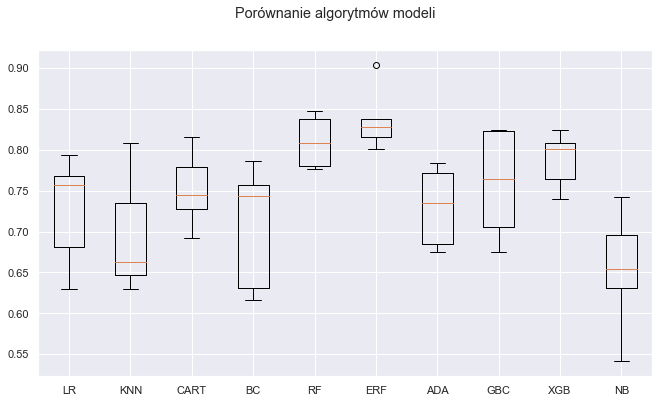

In [28]:
fig = plt.figure(figsize=(11,6))
fig.suptitle('Porównanie algorytmów modeli')
ax = fig.add_subplot(111)
plt.boxplot(results.values())
ax.set_xticklabels(results.keys())
plt.show()

### Stworzenie Pipeline'a do modeli


In [29]:
### Do modeli z Pipelinem

In [30]:
X_train = df.drop("Cost_MatrixRisk", 1) #niezależne wartości
y_train = df["Cost_MatrixRisk"] #zmienna celu

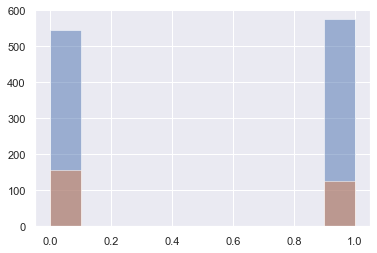

In [31]:
from sklearn.model_selection import train_test_split
train_data, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, shuffle=True, random_state=seed)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin


class CategoryOtherRecoder(BaseEstimator, TransformerMixin):
    """Recode less frequent values as new "Others" category."""

    def __init__(self, threshold_perc):
        """Initialize CategoryOtherRecoder.

        For each column, this recoder converts every value occuring less frequently than theshold_perc
        to "Others". Note that threshold_perc should be a number in range (0, 1).
        """
        self.threshold_perc = threshold_perc

    def fit(self, data, y=None):
        if not isinstance(data, pd.DataFrame):
            data = pd.DataFrame(data)

        self.variable_dictionary = {}
        for column in data.columns:
            freq_table = data[column].value_counts(dropna=True, normalize=True)
            categories = freq_table[freq_table > self.threshold_perc].index
            self.variable_dictionary[column] = categories

        return self

    def transform(self, data):
        if not isinstance(data, pd.DataFrame):
            data = pd.DataFrame(data)

        for column in data.columns:
            data[str(column) + "_rec"] = data[column].apply(
                lambda x: x if x in self.variable_dictionary.get(column) else "Others"
            )
        return data.loc[:, [col for col in data.columns if str(col).endswith("rec")]].values


In [33]:
numerical_feature_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean", copy=True, add_indicator=True)),
        ("scaler", StandardScaler()),
    ]
)

categorical_feature_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        ("other_rare", CategoryOtherRecoder(0.5)),
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_feature_transformer, X_train.select_dtypes("number").columns),
        ("cat", categorical_feature_transformer, X_train.select_dtypes("object").columns),
    ]
)


In [34]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True)),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Credit_amount', 'Age_in_years', 'Duration_in_month',
       'Status_of_existing_checking_account_0_200_DM',
       'Status_of_existing_checking_account_0_DM',
       'Status_of_existing_checking_account_200_DM_',
       'Status_of_existing_check...
       'Other_installment_plans_none', 'Other_installment_plans_store',
       'Housing_for_free', 'Housing_own', 'Housing_rent', 'foreign_worker_no',
       'foreign_worker_yes'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                  

In [35]:
df_prediction = pd.DataFrame(y_test.copy())
df_prediction["prediction"] = y_train.mean()

print("R2: ", r2_score(df_prediction["Cost_MatrixRisk"], df_prediction["prediction"]))
print("MSE: ", mean_squared_error(df_prediction["Cost_MatrixRisk"], df_prediction["prediction"]))
print(
    "RMSE: ",
    np.sqrt(mean_squared_error(df_prediction["Cost_MatrixRisk"], df_prediction["prediction"])),
)

baseline_RMSE = np.sqrt(
    mean_squared_error(df_prediction["Cost_MatrixRisk"], df_prediction["prediction"])
)


R2:  -0.01814516129032273
MSE:  0.2516143176020409
RMSE:  0.5016117199608088


In [36]:
models = {
    "LinearSVC": LinearSVC(max_iter=10000),
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "CART": DecisionTreeClassifier(),
    "BC": BaggingClassifier(),
    "RF": RandomForestClassifier(),
    "ERF": ExtraTreesClassifier(),
    "ADA": AdaBoostClassifier(),
    "GBC": GradientBoostingClassifier(),
    "XGB": XGBClassifier(),
    "NB": GaussianNB(),
}

results = pd.DataFrame(columns=["model", "mse", "rmse"])

for model_name in models:
    print(model_name)
    model = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", models[model_name])])

    clf = GridSearchCV(model, param_grid={}, cv=5, scoring="neg_mean_squared_error")
    clf.fit(train_data, y_train)

    results = results.append(
        pd.DataFrame(
            {
                "model": model_name,
                "mse": -1 * clf.best_score_,
                "rmse": np.sqrt(-1 * clf.best_score_),
            },
            index=[0],
        )
    )


LinearSVC
LR
KNN
CART
BC
RF
ERF
ADA
GBC
XGB
NB


In [37]:
results

,model,mse,rmse
0,LinearSVC,0.280357,0.529488
0,LR,0.275000,0.524404
0,KNN,0.304464,0.551783
0,CART,0.202679,0.450198
0,BC,0.210714,0.459036
0,RF,0.175000,0.418330
0,ERF,0.179464,0.423632
0,ADA,0.266071,0.515821
0,GBC,0.233929,0.483662
0,XGB,0.178571,0.422577


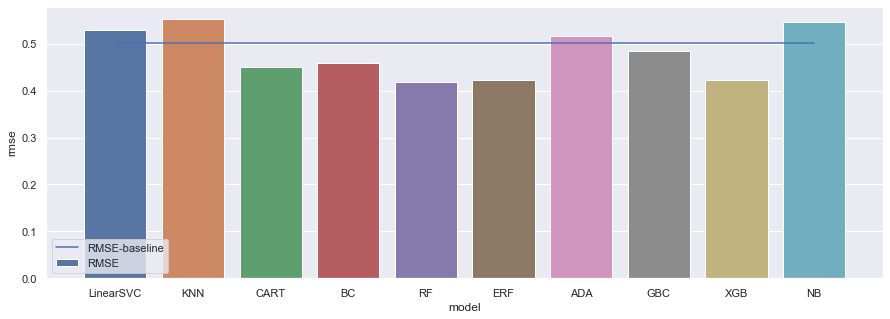

In [38]:
plt.figure(figsize=(15, 5))
sns.barplot(x="model", y="rmse", data=results[results["model"] != "LR"], label="RMSE")
sns.lineplot(x=results[results["model"] != "LR"]["model"], y=baseline_RMSE, label="RMSE-baseline")

In [39]:
grids = []

### Model LinearSVC

In [40]:
pipe = Pipeline([("preprocessing", preprocessor), ("classifier", LinearSVC(C=1, max_iter=10000))])

param_grid = {"classifier__C": [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid.fit(train_data, y_train)
grids.append(grid)
grid.best_params_

C:\Users\Estera\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Estera\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Estera\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Estera\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Estera\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

{'classifier__C': 0.1}

### Model SVC

In [41]:
pipe_2 = Pipeline([("preprocessing", preprocessor), ("classifier", SVC(C=1, probability=True))])

param_grid_2 = {
    "classifier__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    "classifier__gamma": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
}

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(train_data, y_train)
grids.append(grid_2)
grid_2.best_params_

{'classifier__C': 1, 'classifier__gamma': 10}

### Model LogisticRegression

In [42]:
pipe_3 = Pipeline([('preprocessing', preprocessor), ('classifier', LogisticRegression(C=1))])

param_grid_3 = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(train_data, y_train)
grids.append(grid_3)
grid_3.best_params_

{'classifier__C': 1}

### Model KNeighbors 

In [43]:
pipe_4 = Pipeline(
    [
        ("preprocessing", preprocessor),
        ("classifier", KNeighborsClassifier(n_neighbors=2, metric="euclidean")),
    ]
)

param_grid_4 = {
    "classifier__n_neighbors": [2, 3, 4, 5, 6],
    "classifier__metric": ["euclidean", "cityblock", "cosine", "minkowski"],
}


grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(train_data, y_train)
grids.append(grid_4)
grid_4.best_params_

{'classifier__metric': 'cityblock', 'classifier__n_neighbors': 2}

### Model DecisionTreeClassifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

pipe_5 = Pipeline([("preprocessing", preprocessor), ("classifier", DecisionTreeClassifier())])

param_grid_5 = {
    "classifier__max_depth": [5, 9, 10, 11, 20, 30],
    "classifier__min_samples_split": [2, 3, 5, 10, 20, 30, 40],
    "classifier__max_leaf_nodes": [3, 4, 10, 14, 15, 16, 20, 30, 40],
}


grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(train_data, y_train)
grids.append(grid_5)
grid_5.best_params_

{'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 40,
 'classifier__min_samples_split': 3}

### BaggingClassifier

In [45]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

pipe_6 = Pipeline(
    [
        ("preprocessing", preprocessor),
        (
            "classifier",
            BaggingClassifier(
                DecisionTreeClassifier(random_state=42),
                n_estimators=500,
                max_samples=100,
                bootstrap=True,
                random_state=42,
            ),
        ),
    ]
)
param_grid_6 = {
    "classifier__n_estimators": [10, 50, 100],
    "classifier__max_samples": [10, 20, 30],
    "classifier__max_features": [2, 5, 10],
}
grid_6 = GridSearchCV(pipe_6, param_grid_6, cv=kfold, return_train_score=True)
grid_6.fit(train_data, y_train)
grids.append(grid_6)
grid_6.best_params_

{'classifier__max_features': 10,
 'classifier__max_samples': 30,
 'classifier__n_estimators': 100}

### RandomForestClassifier

In [46]:
pipe_7 = Pipeline(
    [
        ("preprocessing", preprocessor),
        ("classifier", RandomForestClassifier(n_estimators=500, max_leaf_nodes=16)),
    ]
)

param_grid_7 = {
    "classifier__n_estimators": [10, 50, 100],
    "classifier__max_leaf_nodes": [10, 20],
    "classifier__max_depth": [10, 20],
}

grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(train_data, y_train)
grids.append(grid_7)
grid_7.best_params_

{'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 50}

### ExtraTreesClassifier

In [47]:
pipe_8 = Pipeline(
    [
        ("preprocessing", preprocessor),
        ("classifier", ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16)),
    ]
)

param_grid_8 = {
    "classifier__n_estimators": [10, 50, 100],
    "classifier__max_leaf_nodes": [10, 20],
    "classifier__max_depth": [10, 20],
}

grid_8 = GridSearchCV(pipe_8, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(train_data, y_train)
grids.append(grid_8)
grid_8.best_params_

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 10}

### AdaBoostClassifier 
### DecisionTreeClassifier

In [48]:
pipe_9 = Pipeline(
    [
        ("preprocessing", preprocessor),
        (
            "classifier",
            AdaBoostClassifier(
                DecisionTreeClassifier(),
                n_estimators=1,
                learning_rate=0.5,
                algorithm="SAMME.R",
                random_state=42,
            ),
        ),
    ]
)


param_grid_9 = {
    "classifier__n_estimators": [5, 10, 50, 100],
    "classifier__base_estimator__max_leaf_nodes": [5, 10, 20],
    "classifier__base_estimator__max_depth": [5, 10, 20, 50, 100],
    "classifier__learning_rate": [0.1, 0.2, 0.5, 0.9, 1],
}

grid_9 = GridSearchCV(pipe_9, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(train_data, y_train)
grids.append(grid_9)
grid_9.best_params_

{'classifier__base_estimator__max_depth': 5,
 'classifier__base_estimator__max_leaf_nodes': 20,
 'classifier__learning_rate': 0.9,
 'classifier__n_estimators': 50}

### GradientBoostingClassifier

In [49]:
pipe_10 = Pipeline(
    [
        ("preprocessing", preprocessor),
        (
            "classifier",
            GradientBoostingClassifier(n_estimators=1, learning_rate=0.5, random_state=42),
        ),
    ]
)


param_grid_10 = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__learning_rate": [0.1, 0.2, 0.5, 0.9, 1],
    "classifier__max_depth": [10, 20, 30],
    "classifier__n_estimators": [10, 20, 30, 50, 100, 200],
}

grid_10 = GridSearchCV(pipe_10, param_grid_10, cv=kfold, return_train_score=True)

grid_10.fit(train_data, y_train)
grids.append(grid_10)
grid_10.best_params_

{'classifier__learning_rate': 1,
 'classifier__max_depth': 10,
 'classifier__n_estimators': 50}

### Xgboost XGBClassifier

In [50]:
pipe_11 = Pipeline(
    [
        ("preprocessing", preprocessor),
        ("classifier", XGBClassifier(n_estimators=1, learning_rate=0.5, random_state=42)),
    ]
)

param_grid_11 = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__learning_rate": [0.1, 0.2, 0.5, 0.9, 1],
    "classifier__subsample": [0.1, 0.2, 0.5, 0.9, 1],
}

grid_11 = GridSearchCV(pipe_11, param_grid_11, cv=kfold, return_train_score=True)

grid_11.fit(train_data, y_train)
grids.append(grid_11)
grid_11.best_params_

{'classifier__learning_rate': 0.5,
 'classifier__n_estimators': 50,
 'classifier__subsample': 1}

## RandomizedSearchCV Xgboost XGBClassifier

In [51]:
from scipy.stats.distributions import uniform, randint

estimator = XGBClassifier(n_jobs=-1)

pipe_12 = Pipeline(
    [("preprocessing", preprocessor), ("classifier", XGBClassifier(n_jobs=-1))]
)

param_grid_12 = {
    "classifier__max_depth": randint(3, 11),
    "classifier__learning_rate": uniform(0.001, 0.1 - 0.001),
    "classifier__n_estimators": randint(50, 400),
    "classifier__gamma": uniform(0, 2),
    "classifier__colsample_bytree": uniform(0.5, 0.5),
    "classifier__subsample": uniform(0.5, 0.5),
    "classifier__min_child_weight": randint(1, 11),
}


grid_12 = RandomizedSearchCV(
    n_iter=90,
    estimator=pipe_12,
    param_distributions=param_grid_12,
    cv=kfold,
    return_train_score=True,
)

grid_12.fit(train_data, y_train)
grids.append(grid_12)
grid_12.best_params_

{'classifier__colsample_bytree': 0.7959203915475749,
 'classifier__gamma': 0.1149628994706493,
 'classifier__learning_rate': 0.05117604316121472,
 'classifier__max_depth': 10,
 'classifier__min_child_weight': 1,
 'classifier__n_estimators': 134,
 'classifier__subsample': 0.771999290074024}

In [52]:
from sklearn import metrics

model_names = [
    "SVN Linear",
    "SVM rbf",
    "LR",
    "KNN",
    "Decision Tree",
    "Bagging",
    "RandomForest",
    "ExtraTrees",
    "AdaBoost",
    "GradientBoosting",
    "XGB",
    "XGB Rand",
]
models = [(name, grid.best_estimator_) for name, grid in zip(model_names, grids)]

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test))))
    print("recall_score: {}".format(metrics.recall_score(y_test, model.predict(X_test))))
    print("f1_score: {}".format(metrics.f1_score(y_test, model.predict(X_test))))
    print("accuracy_score: {}".format(metrics.accuracy_score(y_test, model.predict(X_test))))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append(metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))
    if name == "KNN":
        roc_auc_score.append(metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    elif name in [
        "Decision Tree",
        "Voting",
        "Bagging",
        "RandomForest",
        "ExtraTrees",
        "AdaBoostClassifier",
        "GradientBoosting",
        "XGB",
        "XGB Rand",
    ]:
        roc_auc_score.append(metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    else:
        roc_auc_score.append(metrics.roc_auc_score(y_test, model.decision_function(X_test)))

SVN Linear
precision_score: 0.7441860465116279
recall_score: 0.768
f1_score: 0.7559055118110236
accuracy_score: 0.7785714285714286
SVM rbf
precision_score: 0.7961783439490446
recall_score: 1.0
f1_score: 0.8865248226950355
accuracy_score: 0.8857142857142857
LR
precision_score: 0.732824427480916
recall_score: 0.768
f1_score: 0.75
accuracy_score: 0.7714285714285715
KNN
precision_score: 0.875
recall_score: 0.672
f1_score: 0.7601809954751132
accuracy_score: 0.8107142857142857
Decision Tree
precision_score: 0.7322834645669292
recall_score: 0.744
f1_score: 0.7380952380952381
accuracy_score: 0.7642857142857142
Bagging
precision_score: 0.6666666666666666
recall_score: 0.72
f1_score: 0.6923076923076923
accuracy_score: 0.7142857142857143
RandomForest
precision_score: 0.7368421052631579
recall_score: 0.784
f1_score: 0.7596899224806203
accuracy_score: 0.7785714285714286
ExtraTrees
precision_score: 0.7711864406779662
recall_score: 0.728
f1_score: 0.748971193415638
accuracy_score: 0.7821428571428571


### Podsumowanie wyników klasyfikatorów modeli

In [55]:
import pandas as pd
import numpy as np

d = {
    "precision_score": precision_score,
    "recall_score": recall_score,
    "f1_score": f1_score,
    "accuracy_score": accuracy_score,
    "roc_auc_score": roc_auc_score,
}
df = pd.DataFrame(data=d)
df.insert(
    loc=0,
    column="Method",
    value=model_names
)

In [56]:
def highlight_max(s):
    '''
    Funkcja highlight_max podkreśli najwyższy wynik w kolumnie
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

### Miary oceny klasyfikatora

* Za dokładność rozpoznania w obrębie klasy odpowiada miara **precision**.
* Za rozpoznanie ilości elementów z klasy odpowiada miara **recall**.

![zdjęcie](https://ksopyla.com/wp-content/uploads/2019/10/image-3.png)

Jak porównać do siebie dwa klasyfikatory?

Sprawa jest prosta, gdy wszystkie wartości są dla jednego z nich większe, ale co w sytuacji, gdy w jednym większe jest precision dla klasy “A”, a w drugim recall. W drugim przypadku wykonuje się uśrednienie wyników, do ktorego wykorystywany jest **współczynnik F1**.

![zdjęcie](https://wikimedia.org/api/rest_v1/media/math/render/svg/1bf179c30b00db201ce1895d88fe2915d58e6bfd)

W nieco ogólniejszej formie, współczynnik $F_1$ można zastąpić współczynnikiem $F_\beta$, w którym miary *precision* i *recall* są uśredniane z róznymi wagami.

$$
F_\beta = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}}
$$

Przy czym, dla współczynnika $F_\beta$ metryka recall otrzymuje wagę $\beta$ razy większą niż precision. Na przykład:

- β=1 – precision i recall tak samo ważne
- β=0.5 precision ważniejsze
- β=2 recall ważniejszy
    
**Accuracy score (dokładność)** jest najbardziej intuicyjną miarą wydajności i jest po prostu stosunkiem prawidłowo przewidywanej obserwacji do łącznej liczby obserwacji. Można pomyśleć, że jeśli mamy wysoką dokładność, nasz model jest najlepszy. Dokładność jest świetną miarą, ale tylko wtedy, gdy mamy symetryczny zestawy danych, w których wartości fałszywie dodatnich i fałszywych negatywów są prawie takie same. Dlatego nalezy spojrzeć na inne parametry, aby ocenić wydajność swojego modelu.

In [57]:
df.style.apply(
    highlight_max,
    subset=["precision_score", "recall_score", "f1_score", "accuracy_score", "roc_auc_score"],
)

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,SVN Linear,0.744186,0.768,0.755906,0.778571,0.845265
1,SVM rbf,0.796178,1,0.886525,0.885714,0.918968
2,LR,0.732824,0.768,0.75,0.771429,0.844903
3,KNN,0.875,0.672,0.760181,0.810714,0.840903
4,Decision Tree,0.732283,0.744,0.738095,0.764286,0.801419
5,Bagging,0.666667,0.72,0.692308,0.714286,0.8032
6,RandomForest,0.736842,0.784,0.75969,0.778571,0.86049
7,ExtraTrees,0.771186,0.728,0.748971,0.782143,0.855406
8,AdaBoost,0.830508,0.784,0.806584,0.832143,0.917781
9,GradientBoosting,0.84375,0.864,0.853755,0.867857,0.954529


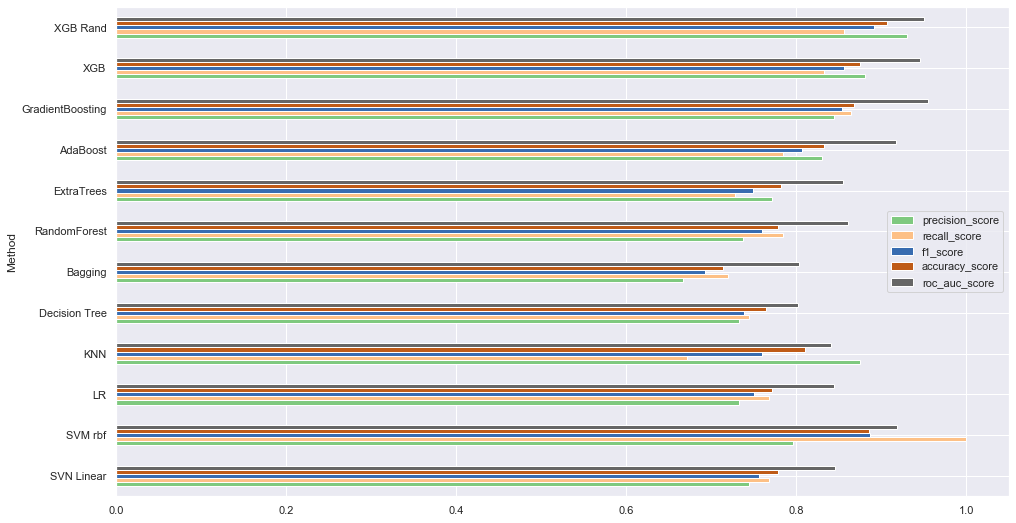

In [58]:
df.plot(x="Method", kind="barh", cmap="Accent", figsize=(16, 9))

### Wykres krzywej ROC dla wyznaczonych klasyfikatorów


<img src='https://mathspace.pl/wp-content/uploads/2016/09/ROC-interp.png' style="width:400px;height:400px"/>
<img src='https://mathspace.pl/wp-content/uploads/2016/09/ROC-interpr-AUROC.png' style="width:400px;height:400px"/>


Im wykres bardziej ”wypukły”, tym lepszy klasyfikator, co widac na pierwszym z wykresów. Pole powierzchni pod wykresem krzywej ROC – AUC (ang. Area Under Curve), przyjmujące wartości w przedziale od 0 do 1, określa zdolność testu do rozgraniczenia wyników prawidłowych i nieprawidłowych. Im większe jest AUC (im bardziej wklęsła będzie funkcja ROC) tym większa jest moc diagnostyczna testu. Tym samym zdolność rozdzielcza testu jest lepsza.

Krzywa ROC jest graficzną reprezentacją efektywności modelu predykcyjnego poprzez wykreślenie charakterystyki jakościowej klasyfikatorów binarnych powstałych z modelu przy zastosowaniu wielu różnych punktów odcięcia. Mówiąc inaczej – każdy punkt krzywej ROC odpowiada innej macierzy błędu uzyskanej przez modyfikowanie „cut-off point”. Finalnie na wykres nanosimy TPR (True-Positive Rate – oś pionowa) oraz FPR (False-Positive Rate – oś pozioma).

![zdjęcie](http://algolytics.com/wp-content/uploads/2018/05/roc1.png)


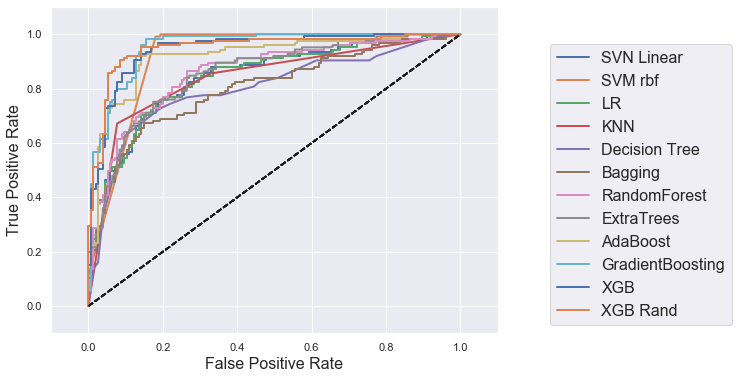

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.1, 1.1, -0.1, 1.1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)


plt.figure(figsize=(8, 6))
for i, (grid, name) in enumerate(zip(grids, model_names)):
    if i < 3:
        fpr_clf, tpr_clf, thresholds_clf = roc_curve(y_test, grid.decision_function(X_test))
    else:
        fpr_clf, tpr_clf, thresholds_cls = roc_curve(y_test, grid.predict_proba(X_test)[:,1])
    plot_roc_curve(fpr_clf, tpr_clf, name)
                                 
plt.legend(loc="lower left", fontsize=16, bbox_to_anchor=(1.1, 0))

Najlepszą wartość metryki AUC dla krzywej ROC przyjął klasyfikator GradientBoosting, bardzo zbliżone wyniki przyjęły metody SVM RB, XGB oraz XGB Rand. Wykresy tych krzywych sa najbardziej wypukłe co widać wyraźne na powyższym wykresie, stanowia one grupę klasyfikatorów lepszych od reszty.

Najlepsze wyniki wskaźnika accuracy wystąpiły dla klasyfikatora XGB Rand, kolejno GradientBoosting i SVM rbf. 
Wskaźnik F1 najlepszy wynik osiągnął dla klasyfikatora XGB Rand.

XGB Rand osiągnął najlepsze wyniki w kilku pozycjach: precision score, f1 score, accuracy score. 